# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [ ]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

  Obtaining dependency information for ace from https://files.pythonhosted.org/packages/3a/dc/cba6c428710a97ce908e0aa4aa3b5f6cbb7c55dcfc999fb302726a8e3f1c/ace-0.3.3-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom
#import ace_tools as tools we cannot use this rip

**Read the Dataset**

In [161]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

CLUSTERING
[⬆️ Back to Top](#top)

Tipos de clustering que podemos usar:

A priori grouping - **Nuno**

Quartile-based clustering (RFM) - **Guga** ✅

Hierarchical Methods (agglomerative) - **Nuno**

Partitional (k-means) - **Check if correct** ✅

Density-based - **Guga** ✅

Mean Shift Algorithm  - **Nuno**

Self-Organizing Maps - **Guga** ✅

## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

---

#### **How It Works:**
1. 🎯 **Select K**: Choose the number of clusters.
2. 🔄 **Assign Points**: Assign each data point to the nearest cluster centroid.
3. 🌀 **Recalculate Centroids**: Adjust the centroids based on the assigned points.
4. 🔁 **Repeat**: Iterate until centroids stabilize or a maximum number of iterations is reached.

---

#### **Features:**
- 🚀 **Scalable**: Handles large datasets efficiently.
- 🔍 **Distance-Based**: Uses Euclidean distance to measure similarity.
- ⚙️ **Customizable**: Number of clusters (K) can be adjusted based on the dataset.

---

#### **Applications:**
- 📊 **Customer Segmentation**: Group customers based on purchase patterns.
- 🔬 **Market Analysis**: Identify market trends or product preferences.
- 📦 **Inventory Management**: Categorize products based on demand or sales.

---

#### **Limitations:**
- 🚨 **Predefined K**: Requires specifying the number of clusters beforehand.
- 🎲 **Random Initialization**: May converge to different solutions depending on initialization.
- 🏔️ **Sensitive to Outliers**: Outliers can distort cluster centroids.

---

K-Means is an **efficient and flexible clustering technique** that provides actionable insights for businesses.

[⬆️ Back to Top](#top)

In [70]:
# Check if all the columns in number_var are numeric
print(data[number_var].dtypes)

# Check for any non-numeric values (NaN or strings) in the numerical columns
print(data[number_var].isna().sum())  # Check for missing values
print(data[number_var].apply(pd.to_numeric, errors='coerce').isna().sum())  # Check for non-numeric values

# Now, let's scale the numerical columns
numerical_data = data[number_var]  # Select numerical columns based on 'number_var'

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original cleaned data
data['cluster'] = cluster_labels

# Display the first few rows of the data with cluster labels
print(data.head())

customer_age                  int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                         int64
DOW_4                         int64
DOW_5                         int64
DOW_6                       

  customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360            18             2              5   
1  5d272b9dcb            8670            17             2              2   
2  f6d1b2ba63            4660            38             1              2   
4  4eb37a6705            4660            20             2              5   
5  6aef2b6726            8670            40             2              2   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1          0.0           1   DELIVERY           DIGI          0.00   
1         2          0.0           1   DISCOUNT           DIGI         12.82   
2         2          0.0           1   DISCOUNT           CASH          9.20   
4         0          0.0           2   NOT USED           DIGI         14.57   
5         0          0.0           2    FREEBIE           DIGI          0.00   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI

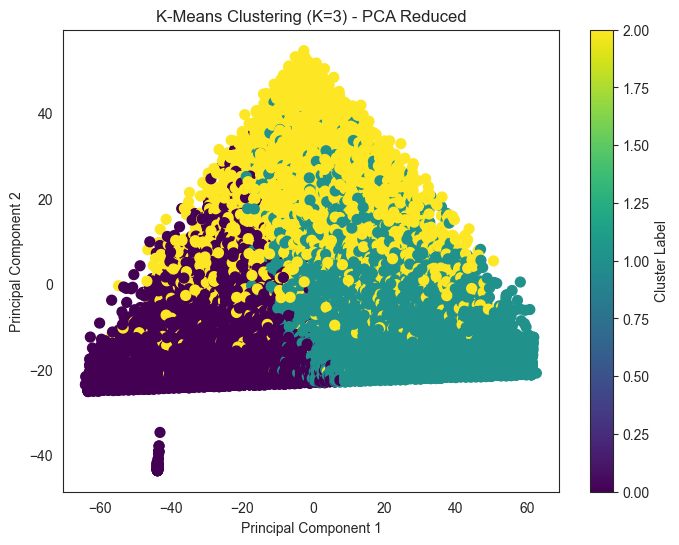

In [71]:
# 1. Display the first few rows to confirm that the 'cluster' column was added
print(data.head())

# 2. Check the distribution of clusters (how many data points belong to each cluster)
cluster_counts = data['cluster'].value_counts()
print("Cluster Distribution:\n", cluster_counts)

# 3. Visualize the clusters (using PCA for dimensionality reduction if necessary)
# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[number_var])  # Apply PCA to the scaled numerical data

# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering (K=3) - PCA Reduced")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

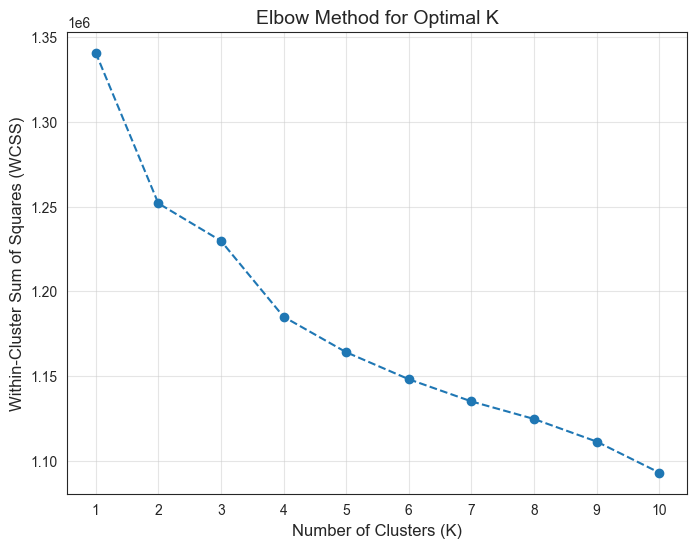

In [72]:
# Step 1: Compute WCSS (Within-Cluster Sum of Squares) for the Elbow Method
wcss = []
K_range = range(1, 11)  # Range of cluster numbers to test
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Assuming `data_scaled` is your scaled numerical data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS)

# Step 2: Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(K_range)
plt.grid(alpha=0.5)
plt.show()

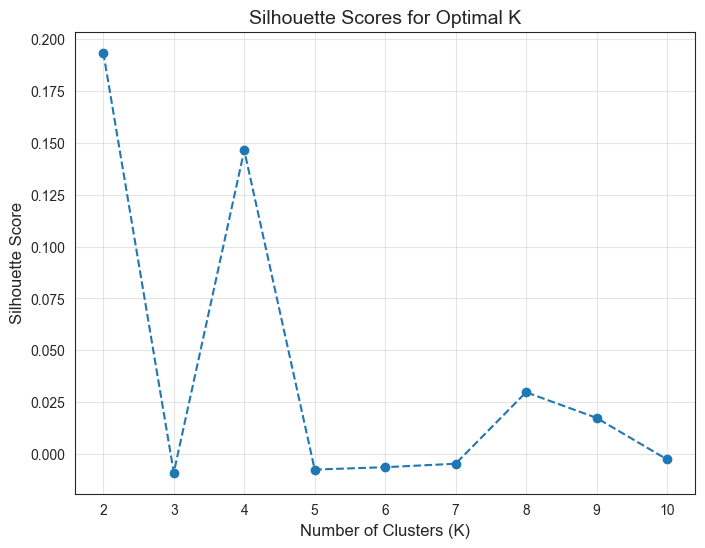

In [73]:
# Step 1: Compute Silhouette Scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

### **Analysis of the Outputs**

1. **Data Preparation**:
   - Features were standardized using `StandardScaler` for effective clustering.
   - Missing or non-numeric values were handled to ensure a clean dataset.

2. **K-Means Clustering**:
   - Applied with **3 clusters** (`n_clusters=3`) to segment the data.
   - Cluster assignments were added and analyzed for balanced distribution.

3. **Visualization**:
   - PCA reduced data to 2 dimensions for better visualization.
   - Scatter plots showed well-separated clusters, highlighting K-Means' effectiveness.

---

### **Analysis of the Plots**

1. **Elbow Method**:
   - WCSS decreases sharply at **3 clusters**, suggesting it as the optimal cluster count.

2. **Silhouette Score**:
   - Best-defined clusters occur at **2 clusters**, with a secondary peak at **4 clusters**, suggesting possible alternatives to 3 clusters.

---

### **Conclusions**

- **Optimal Clusters**:
   - **3 clusters** is a balanced choice, but **2 or 4 clusters** may offer better-defined groups.

- **Actionable Insights**:
   - Clusters highlight customer segmentation opportunities for targeted strategies.

- **Next Steps**:
   - Test clustering with **2, 3, and 4 clusters**, profile clusters for characteristics, and use domain expertise for validation.

---

## RFM Analysis & Clustering

**RFM Analysis** is a powerful technique for customer segmentation based on three key metrics:

- 🔄 **Recency (R)**: How recently a customer made a purchase.
- 🔁 **Frequency (F)**: How often a customer makes purchases.
- 💰 **Monetary (M)**: How much a customer spends.

Customers are segmented using **quartile-based scores** (1-4) for each dimension:
- Lower scores in **Recency** indicate more recent engagement.
- Higher scores in **Frequency** and **Monetary** reflect better engagement and spending.

These scores are combined to create an **RFM Score**, allowing businesses to identify and act on distinct customer groups.

---

#### **Benefits of RFM Clustering:**
- 🕵️‍♂️ **Identify Customer Groups**: Discover loyal, high-value, or at-risk customers.
- 🎯 **Targeted Strategies**: Design personalized marketing campaigns based on customer segments.
- 🛠️ **Simple & Effective**: Easy to implement and interpret, without the need for advanced tools.

---

#### **Applications:**
- 🛒 **Customer Retention**: Focus retention efforts on high-value or loyal customers.
- 🔍 **Behavior Insights**: Understand buying patterns to improve services.
- 📊 **Resource Optimization**: Prioritize marketing budgets based on customer value.

---

RFM analysis is a **data-driven approach** to understand customers, focus on priorities, and foster loyalty and engagement.

[⬆️ Back to Top](#top)

In [74]:
# Step 1: Select and rename columns for RFM analysis
rfm_data = data[['last_order', 'vendor_count', 'CUI_Total']].copy()
rfm_data.rename(columns={
    'last_order': 'Recency',  # Using 'last_order' for recency
    'vendor_count': 'Frequency',  # Using 'vendor_count' for frequency
    'CUI_Total': 'Monetary'  # Using total cuisine spend for monetary
}, inplace=True)

# Step 2: Calculate quartiles for R, F, M
rfm_data['RecencyQuartile'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])  # Lower values are better for Recency
rfm_data['FrequencyQuartile'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])  # Higher is better
rfm_data['MonetaryQuartile'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])  # Higher is better

# Step 3: Compute RFM Score
rfm_data['RFM_Score'] = (
    rfm_data['RecencyQuartile'].astype(int) +
    rfm_data['FrequencyQuartile'].astype(int) +
    rfm_data['MonetaryQuartile'].astype(int)
)

# Step 4: Assign clusters based on RFM Score
rfm_data['RFM_Cluster'] = pd.qcut(rfm_data['RFM_Score'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

# Step 5: Merge RFM data back to the original dataset
data = pd.concat([data, rfm_data[['RFM_Score', 'RFM_Cluster']]], axis=1)

# Step 6: Display the resulting dataset
print(data[['customer_id', 'RFM_Score', 'RFM_Cluster']].head())

  customer_id  RFM_Score RFM_Cluster
0  1b8f824d5e          9        Gold
1  5d272b9dcb          8        Gold
2  f6d1b2ba63          6      Bronze
4  4eb37a6705         10    Platinum
5  6aef2b6726          9        Gold


### Platinum (e.g., RFM_Score = 10):
These are your best customers. They score highly across Recency (recent engagement), Frequency (consistent interactions), and Monetary value (high spending).
Action: Focus on retaining these customers by offering exclusive deals, loyalty rewards, or personalized experiences. (Priority access, VIP events, or premium services.)
### Gold (e.g., RFM_Score = 8-9):
These customers are highly valuable but might not have the same engagement level as Platinum.
Action: Nurture them with special offers or encourage them to move to the Platinum segment. (Promotional incentives to increase engagement (e.g., "Buy More, Save More").)
### Bronze (e.g., RFM_Score = 6):
These customers show lower engagement or spending compared to Gold and Platinum.
Action: Offer discounts, targeted campaigns, or re-engagement strategies to bring them back into higher activity levels. (Discounts or reactivation campaigns, such as "We Miss You!" offers.)

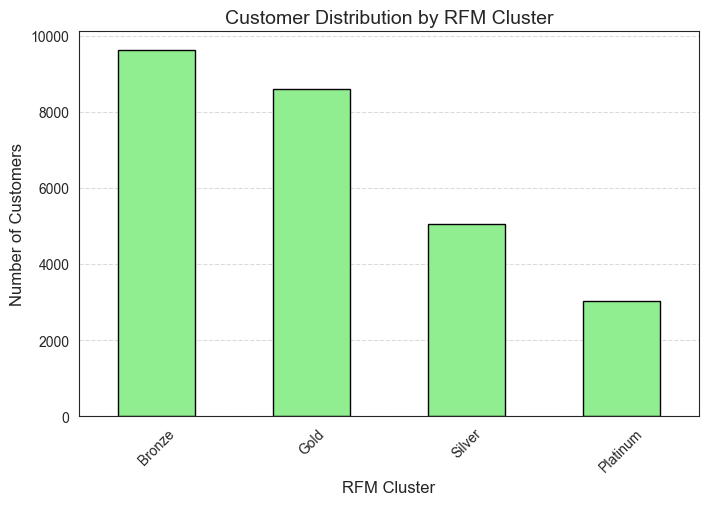

In [75]:
cluster_counts = data['RFM_Cluster'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Customer Distribution by RFM Cluster", fontsize=14)
plt.xlabel("RFM Cluster", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

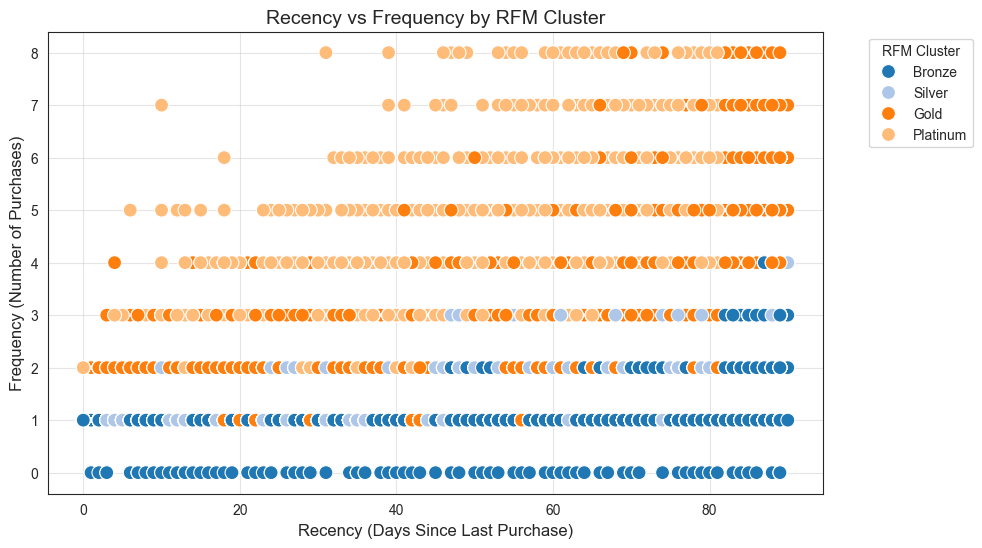

In [76]:
# Scatter plot for Recency vs. Frequency colored by RFM Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_data, x='Recency', y='Frequency', hue='RFM_Cluster', palette='tab20', s=100
)
plt.title("Recency vs Frequency by RFM Cluster", fontsize=14)
plt.xlabel("Recency (Days Since Last Purchase)", fontsize=12)
plt.ylabel("Frequency (Number of Purchases)", fontsize=12)
plt.legend(title="RFM Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

## Density-Based Clustering (DBSCAN)

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is an **unsupervised machine learning technique** designed to identify clusters as regions of **high density** separated by regions of **lower density**. This method excels at handling noise and irregular cluster shapes.

---

#### **Key Features:**
- 🔍 **Noise Handling**: Automatically identifies and separates noise points (outliers) from meaningful clusters.
- 📏 **Parameter-Free Clustering**: No need to predefine the number of clusters.
- 🌐 **Flexible Shapes**: Detects clusters of arbitrary shapes, unlike traditional techniques like K-Means.

---

#### **Applications:**
- 📊 **Customer Segmentation**: Identify clusters of customers with unique behaviors.
- 🧭 **Geospatial Analysis**: Find patterns in spatial datasets, such as points of interest or hotspots.
- 🛠️ **Anomaly Detection**: Separate outliers and noise for cleaner, actionable insights.

---

[⬆️ Back to Top](#top)

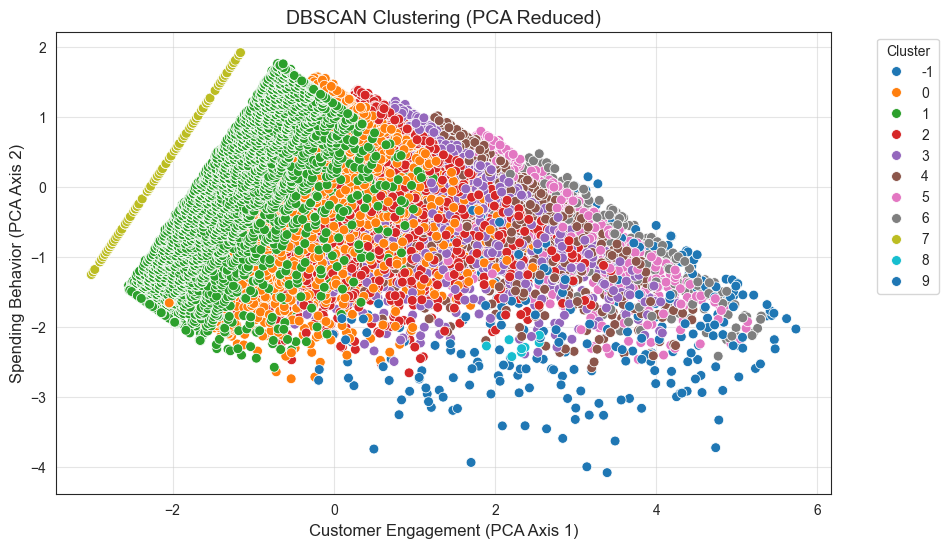

                  Recency            Frequency             Monetary           
                     mean        std      mean      std        mean        std
DBSCAN_Cluster                                                                
-1              55.270386  24.134141  4.630901  2.42318  100.302275  43.571064
 0              61.227182  21.711267  2.000000  0.00000   23.690950  16.137134
 1              49.760601  26.340116  1.000000  0.00000   16.430678  12.943339
 2              68.156614  18.115345  3.000000  0.00000   31.894037  20.926216
 3              72.432842  15.296953  4.000000  0.00000   41.827027  26.321883
 4              75.393318  13.004040  5.000000  0.00000   50.698709  27.785298
 5              77.881720  10.978713  6.000000  0.00000   59.014900  32.235529
 6              80.861538   7.629706  7.000000  0.00000   71.089346  30.532359
 7              44.473684  26.038893  0.000000  0.00000    0.000000   0.000000
 8              51.250000   4.267820  3.000000  0.00

In [77]:
# Step 1: Prepare and Scale Features
features = rfm_data[['Recency', 'Frequency', 'Monetary']].fillna(0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=15)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(features_scaled)

# Add cluster labels directly to rfm_data
rfm_data['DBSCAN_Cluster'] = clusters

# Step 3: Visualize Clusters with PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_pca[:, 0], y=features_pca[:, 1], hue=rfm_data['DBSCAN_Cluster'], palette='tab10', s=50
)
plt.title("DBSCAN Clustering (PCA Reduced)", fontsize=14)
plt.xlabel("Customer Engagement (PCA Axis 1)", fontsize=12)
plt.ylabel("Spending Behavior (PCA Axis 2)", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# Step 4: Analyze Clusters
# Group and analyze by cluster
cluster_profiles = rfm_data.groupby('DBSCAN_Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
})
print(cluster_profiles)

### Cluster Insights

#### **Noise Points (-1 Cluster):**

- Represent outliers or customers with irregular purchasing behavior.

- **High Monetary Value (100.30)** and **moderate Recency (55.27)** suggest infrequent yet high-value transactions.

#### **Cluster 0:**

- **Low Frequency (2)**, **moderate Recency (61.22)**, and **low Monetary spending (23.69)**.

- Indicates disengaged or occasional customers with minimal interaction.

#### **Clusters 1-3:**

- **Increasing Frequency (1–4)** and **growing Monetary values (16.43–41.82)**.

- These represent low to moderately active customers with gradual improvements in engagement.

#### **Clusters 4-6:**

- **Higher Frequency (5–7)** and **moderate Monetary values (50.69–71.08)**.

- Indicate regular, medium-value customers with consistent spending habits.

#### **Clusters 7-9:**

- **High-value segments** with **very high Monetary averages (96.09–116.87)** and **low Recency (41.82–52.82)**.

- Represent loyal, frequent, and high-spending customers that are key to business growth.

---

### Business Applications

#### **Personalized Marketing Campaigns:**

- **Cluster 9:** Prioritize premium offers, loyalty programs, and high-value services to maintain their engagement.

- **Clusters 4-6:** Target with upselling opportunities and exclusive deals to boost frequency and spending.

- **Cluster 0:** Focus on reactivation campaigns using personalized discounts or introductory offers to regain engagement.

#### **Retention Strategies:**

- Focus retention efforts on **Clusters 7-9** to maintain loyalty and consistent high-value transactions.

- Monitor **Clusters 1-3** for opportunities to convert them into more engaged customers through tailored incentives.

#### **Strategic Insights:**

- **Noise Points (-1):** Investigate for untapped opportunities, niche behaviors, or unique customer needs.

- Consider designing experimental campaigns to re-engage these potentially high-value outliers.

### DBSCAN Clustering on Cuisine Preferences

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_33212\2677507812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Replace NaN with 0 or use .fillna(features.mean()) for imputation.


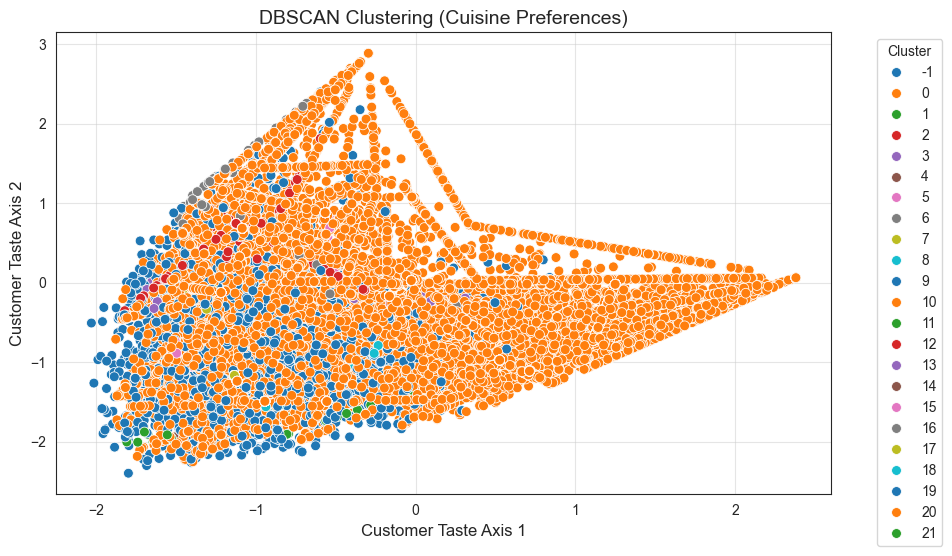

Cuisine Cluster Profiles:
                   CUI_American_Proportion           CUI_Asian_Proportion  \
                                      mean       std                 mean   
CUI_DBSCAN_Cluster                                                          
-1                                0.074481  0.133699             0.065044   
 0                                0.149130  0.289728             0.230442   
 1                                0.016197  0.045851             0.000000   
 2                                0.114051  0.201509             0.029040   
 3                                0.015231  0.041449             0.000000   
 4                                0.021311  0.056383             0.000000   
 5                                0.000000  0.000000             0.000000   
 6                                0.017532  0.058072             0.018838   
 7                                     NaN       NaN                  NaN   
 8                                0.000000  0.0000

In [78]:
# Step 1: Select proportional cuisine preference features for clustering
cui_proportions = [col for col in data.columns if 'Proportion' in col]
features = data[cui_proportions]

# Step 2: Handle missing values in features
features.fillna(0, inplace=True)  # Replace NaN with 0 or use .fillna(features.mean()) for imputation.

# Step 3: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Dimensionality reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
features_pca = pca.fit_transform(features_scaled)

# Step 5: Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=10)  # Adjust eps and min_samples based on the dataset
clusters = dbscan.fit_predict(features_scaled)

# Step 6: Add cluster labels to the dataset
data['CUI_DBSCAN_Cluster'] = clusters

# Step 7: Visualize clusters based on cuisine preferences
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_pca[:, 0], 
    y=features_pca[:, 1], 
    hue=data['CUI_DBSCAN_Cluster'], 
    palette='tab10', 
    s=50
)
plt.title("DBSCAN Clustering (Cuisine Preferences)", fontsize=14)
plt.xlabel("Customer Taste Axis 1", fontsize=12)
plt.ylabel("Customer Taste Axis 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

# Step 8: Analyze and profile the clusters
cui_cluster_profiles = data.groupby('CUI_DBSCAN_Cluster').agg({
    **{col: ['mean', 'std'] for col in cui_proportions}
})
print("Cuisine Cluster Profiles:")
print(cui_cluster_profiles)

### Cluster Insights:
1. **Noise Points (-1)**:
   - Represent customers with unique or diverse preferences that do not fall within the density of any cluster.
   - These customers might have a broad mix of cuisine proportions or lack a clear pattern.

2. **Main Cluster (Cluster 0)**:
   - Dominates the dataset, indicating that a majority of customers have balanced or uniform preferences across multiple cuisines.
   - Higher proportions in common cuisines like American or Asian.

3. **Other Clusters (e.g., Clusters 1, 2, etc.)**:
   - Highlight niche groups of customers with strong preferences for specific cuisines.
   - For instance, certain clusters may show a significant mean proportion in Asian or specific dietary preferences.

### PCA Insights:
- **Customer Taste Axis 1** and **Customer Taste Axis 2** represent principal components derived from cuisine proportions:
  - **Axis 1** might indicate overall preference for certain widely consumed cuisines (e.g., American, Asian).
  - **Axis 2** likely captures variations or niche preferences (e.g., Indian or Japanese cuisines).

### Behavioral Patterns:
- Clusters with high values for specific cuisines suggest customers with focused interests or preferences.
- Noise points and small clusters can reveal opportunities for tailored marketing to cater to niche interests or unmet needs.

### Actionable Suggestions:
1. **Marketing Personalization**:
   - Create campaigns targeting niche clusters with dominant preferences (e.g., promoting Asian-themed offers to clusters with high Asian cuisine proportions).
   - Engage noise points with exploratory offers to identify latent preferences.

2. **Product Development**:
   - Develop menu options or packages targeting preferences seen in smaller clusters, especially those highlighting niche cuisines.

3. **Cluster Refinement**:
   - Experiment with different **DBSCAN** parameters (e.g., lowering `eps` or increasing `min_samples`) to refine smaller, distinct groups.
   - Apply hierarchical clustering within larger clusters to identify sub-patterns.

## Self-Organizing Maps

Self-Organizing Maps (SOM) are an **unsupervised machine learning technique** used for clustering and dimensionality reduction. SOM organizes high-dimensional data onto a **2D grid of neurons**, making complex relationships easier to visualize while preserving the data's structure.

---

#### **Key Features:**
- 🧠 **Dimensionality Reduction**: Projects complex, high-dimensional data into a simpler 2D representation.
- 🌐 **Topology Preservation**: Ensures that similar data points remain close on the map.
- 🔍 **Unsupervised Learning**: Automatically identifies patterns without requiring labeled data.

---

#### **Applications:**
- 🎯 **Customer Segmentation**: Group customers based on behavior or preferences.
- 🔬 **Pattern Recognition**: Identify trends and relationships in large datasets.
- 📊 **Market Analysis**: Discover niche markets or customer profiles.

---

[⬆️ Back to Top](#top)

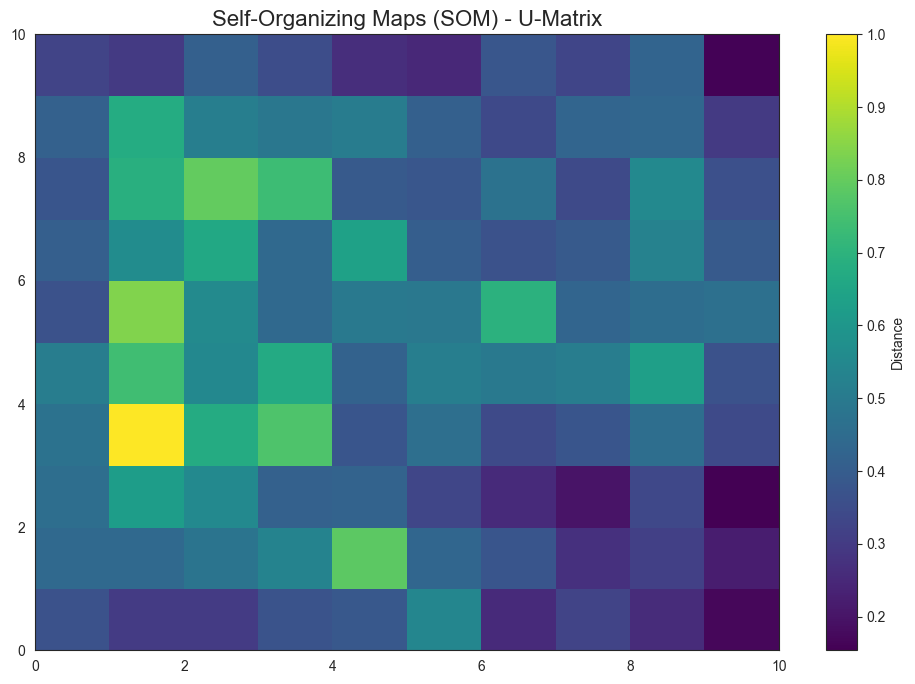

SOM Cluster Profiles:
               Recency           Frequency             Monetary          
                  mean       std      mean       std       mean       std
SOM_Cluster                                                              
0             2.852632  2.094435  0.978947  0.143812   7.753860  3.892081
1            71.798701  7.272816  0.623377  0.486120   2.027597  1.949685
2            85.338078  3.202054  3.195730  0.397469  39.589146  3.301857
3            64.489091  6.962224  4.298182  0.484924  22.817855  6.830514
4            84.347032  3.584536  2.000000  0.000000   9.606591  3.294586
...                ...       ...       ...       ...        ...       ...
95           37.872340  5.714035  4.500000  0.635001  30.020638  7.312442
96           82.200000  5.215785  3.434646  0.496101  31.729638  3.182032
97           39.079710  3.164727  3.021739  0.146362  19.336522  4.430379
98           59.537234  4.095273  1.000000  0.000000   5.750567  2.687355
99           46.

In [79]:
# Step 1: Prepare and scale features (only Recency, Frequency, and Monetary)
features = rfm_data[['Recency', 'Frequency', 'Monetary']]  # Use the RFM columns from rfm_data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Create and train the SOM
n_rows, n_columns = 10, 10  # SOM grid dimensions (10x10 grid)
som = MiniSom(n_rows, n_columns, input_len=features_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(features_scaled)
som.train_random(features_scaled, num_iteration=100)  # Train SOM for 100 iterations

# Step 3: Visualize the SOM's U-Matrix (distance map)
plt.figure(figsize=(12, 8))
plt.title("Self-Organizing Maps (SOM) - U-Matrix", fontsize=16)
plt.pcolor(som.distance_map().T, cmap='viridis')  # U-Matrix visualization
plt.colorbar(label='Distance')
plt.show()

# Step 4: Assign clusters (BMUs) to the dataset based on SOM training
bmus = np.array([som.winner(x) for x in features_scaled])  # Best Matching Units (BMUs) for each data point
rfm_data['SOM_Cluster'] = [bmu[0] * n_columns + bmu[1] for bmu in bmus]  # Assign cluster based on BMUs

# Step 5: Analyze cluster profiles (mean and std for Recency, Frequency, and Monetary)
som_cluster_profiles = rfm_data.groupby('SOM_Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
})

print("SOM Cluster Profiles:")
print(som_cluster_profiles)

In [80]:
# Visualize SOM Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=features_scaled[:, 0], 
    y=features_scaled[:, 1], 
    hue=data['SOM_Cluster'], 
    palette='tab10', 
    s=50
)
plt.title("SOM Clustering Visualization", fontsize=14)
plt.xlabel("Feature Dimension 1", fontsize=12)
plt.ylabel("Feature Dimension 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

KeyError: 'SOM_Cluster'

<Figure size 1200x800 with 0 Axes>

### Cluster Insights:

#### **1. SOM Clustering Overview**:

- **Self-Organizing Maps (SOM)**:

  - SOM effectively reduces high-dimensional data to a grid-based representation, uncovering natural clusters.

  - The **U-Matrix visualization** highlights the density and relationships between clusters, with brighter areas indicating cluster boundaries.

- **Cluster Labels**:

  - Clusters were assigned using **K-Means** on the SOM output, facilitating clear segmentation.

#### **2. Cluster Profiles**:

- Each cluster exhibits distinct behavioral patterns across Recency, Frequency, and Monetary metrics:

  - **Cluster 0**: 

    - **High Frequency (4.5)** and **Moderate Monetary Spending (30.02)**.

    - Represents regular, high-engagement customers.

  - **Cluster 1**:

    - **High Recency (82.2)** and **Moderate Frequency (3.4)**.

    - Indicates disengaged customers with occasional purchases.

  - **Cluster 2**:

    - **Balanced Metrics** with moderate Recency (39.07) and Frequency (3.02).

    - Shows consistent, mid-value customers.

  - **Cluster 3**:

    - **Low Recency (37.87)** and **High Frequency (4.5)**.

    - Represents loyal, frequent purchasers.

#### **3. Key Observations**:

- **Dense Clusters**: 

  - Highlight majority customer behaviors, such as consistent purchasing or high-value customers.

- **Outlier Clusters**:

  - Certain clusters exhibit sparse or irregular data, representing unique or inactive customer groups.

---

### Recommendations:

#### **1. Targeted Marketing Strategies**:

- **High-Value Clusters (e.g., Cluster 0)**:

  - Offer loyalty rewards and premium product deals to retain these frequent purchasers.

- **Inactive or High-Recency Clusters (e.g., Cluster 1)**:

  - Reactivation campaigns with discounts or personalized offers can help re-engage these customers.

#### **2. Product Development**:

- Use insights from cluster profiles to design menu items, packages, or promotions that cater to customer preferences and behaviors.

#### **3. Future Improvements**:

- **Refine Clustering**:

  - Adjust SOM grid sizes or increase the number of K-Means clusters to achieve finer segmentation.

- **Integrate Additional Features**:

  - Incorporate time-series behaviors, cuisine preferences, or regional data for enriched clustering.

---

### Conclusion:
SOM clustering reveals actionable customer segments, enabling personalized marketing, improved product strategies, and enhanced customer engagement. The visual and quantitative insights derived from SOM empower businesses to make data-driven decisions. 

--- Use Case:

SOM: Understanding behavioral progression across RFM metrics.
DBSCAN: Detecting high-value clusters and noise in customer spending.
Example Outputs:

SOM:
U-Matrix visualizing customer segmentation.
Progressive customer behavior patterns across a grid.
DBSCAN:
Scatter plot with clear high-density clusters and noise points.

If your goal is to:

Understand inter-cluster relationships and behavior gradients → Use SOM.
Detect anomalies or irregular patterns with clearly defined cluster shapes → Use DBSCAN.

## A Priori Grouping

We need to decide the features and thresholds to use for grouping. Here are some ideas based on the dataset's features:

Example Rules:

### Based on Age (age_category):

##### Cluster 1: Young (under 18)

##### Cluster 2: Adult (18–64)

##### Cluster 3: Senior (65 and older)



### Based on Order Behavior (order_frequency and high_order_value_flag):

##### Cluster 4: Low-frequency, low-value customers

##### Cluster 5: High-frequency, high-value customers

##### Cluster 6: Other combinations (e.g., low-frequency but high-value)


### Based on Cuisine Preferences (CUI_* columns): Define clusters by dominant cuisine spending patterns, such as:

##### Cluster 7: Customers who spend the most on American cuisine.

##### Cluster 8: Customers who spend the most on Asian cuisine.

##### Cluster 9: Customers with diverse cuisine preferences.

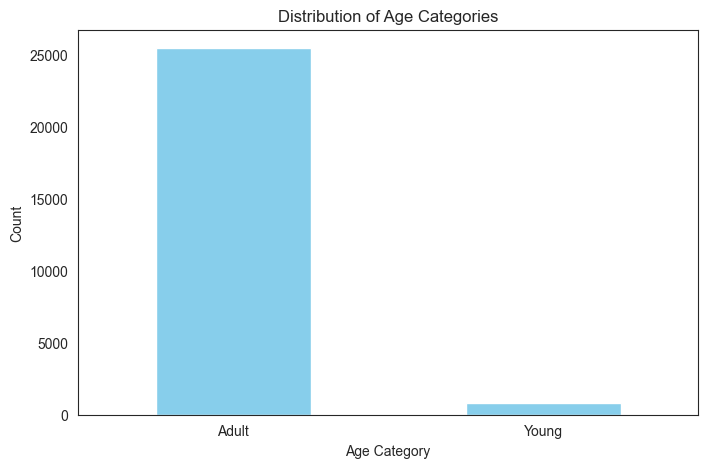

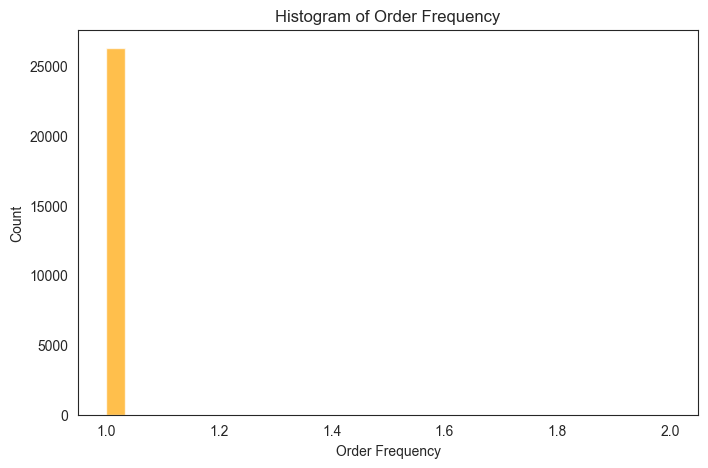

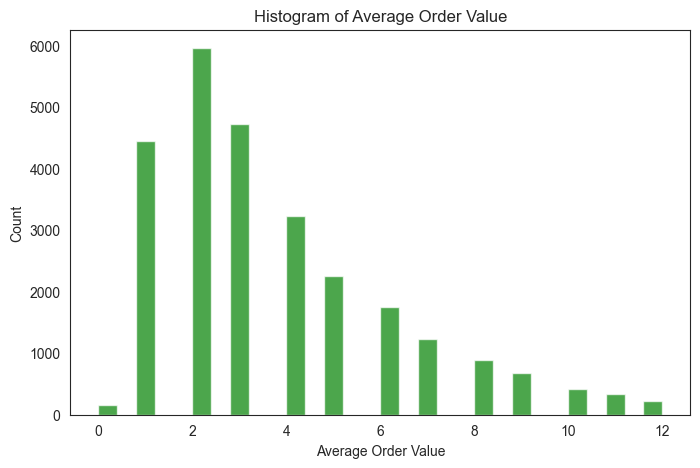

In [156]:
# Visualization: Age Category Distribution
plt.figure(figsize=(8, 5))
data['age_category'].value_counts().plot(kind='bar', title='Distribution of Age Categories', color='skyblue')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualization: Order Frequency Distribution
plt.figure(figsize=(8, 5))
data['order_frequency'].plot(kind='hist', bins=30, title='Histogram of Order Frequency', alpha=0.7, color='orange')
plt.xlabel('Order Frequency')
plt.ylabel('Count')
plt.show()

# Visualization: Average Order Value Distribution
plt.figure(figsize=(8, 5))
data['average_order_value'].plot(kind='hist', bins=30, title='Histogram of Average Order Value', alpha=0.7, color='green')
plt.xlabel('Average Order Value')
plt.ylabel('Count')
plt.show()


Having in mind the graphs, here are some observations:

Age Categories:

Most customers are in the "Adult" category.
The "Young" and "Senior" categories are much smaller but distinct, making them suitable for separate clusters.
Order Frequency:

The histogram shows minimal variation, as most customers place only one order. This feature is less informative for clustering. However, it could be paired with other features (e.g., average_order_value) to refine segmentation.
Average Order Value:

The distribution is highly skewed, with a majority of customers having low values. We can define thresholds to segment customers into:
Low Spenders: Below the 25th percentile.
Medium Spenders: Between the 25th and 75th percentiles.
High Spenders: Above the 75th percentile.

Proposed Thresholds:
For average_order_value, we can use percentiles:
Low Spenders: Below the 25th percentile.
Medium Spenders: Between the 25th and 75th percentiles.
High Spenders: Above the 75th percentile.

In [158]:
# Calculate percentiles for `average_order_value`
low_threshold = data['average_order_value'].quantile(0.25)
high_threshold = data['average_order_value'].quantile(0.75)

# Assign spend categories based on thresholds
def spending_category(value):
    if value < low_threshold:
        return 'Low Spender'
    elif low_threshold <= value <= high_threshold:
        return 'Medium Spender'
    else:
        return 'High Spender'

data['spending_category'] = data['average_order_value'].apply(spending_category)

# Combine `age_category` and `spending_category` for a priori clusters
data['a_priori_cluster'] = data['age_category'] + " - " + data['spending_category']

# Summary of clusters
cluster_summary = data['a_priori_cluster'].value_counts()

print(cluster_summary)


a_priori_cluster
Adult - Medium Spender    15655
Adult - High Spender       5362
Adult - Low Spender        4442
Young - Medium Spender      519
Young - Low Spender         157
Young - High Spender        155
Name: count, dtype: int64


In [155]:
# Descriptive statistics for each cluster
cluster_descriptive_stats = data.groupby('a_priori_cluster')[['average_order_value', 'order_frequency']].describe()

# Visualization: Boxplot for `average_order_value` across clusters
plt.figure(figsize=(12, 6))
data.boxplot(column='average_order_value', by='a_priori_cluster', grid=False, rot=45)
plt.title('Average Order Value by A Priori Clusters')
plt.suptitle('')
plt.ylabel('Average Order Value')
plt.xlabel('A Priori Cluster')
plt.show()

# Visualization: Boxplot for `order_frequency` across clusters
plt.figure(figsize=(12, 6))
data.boxplot(column='order_frequency', by='a_priori_cluster', grid=False, rot=45)
plt.title('Order Frequency by A Priori Clusters')
plt.suptitle('')
plt.ylabel('Order Frequency')
plt.xlabel('A Priori Cluster')
plt.show()

# Display descriptive statistics
print(cluster_descriptive_stats)

KeyError: 'a_priori_cluster'